#  Regression with a Mohs Hardness Dataset

<img src="https://www.nps.gov/articles/images/Mohs_Scale2_1.jpg?maxwidth=1300&autorotate=false" width="700">


 **In this project**, the goal is to predict the **Mohs hardness** of minerals based on their physical and chemical properties.  
The dataset comes from a **Kaggle Playground Series** competition, and the task is a **regression problem** where the target variable is **Hardness**.


---

## Features Description

- `id`: Unique identifier for each observation
- `allelectrons_Total`: Total number of electrons in the mineral
- `density_Total`: Total density of the mineral
- `allelectrons_Average`: Average number of electrons
- `val_e_Average`: Average valence electrons
- `atomicweight_Average`: Average atomic weight
- `ionenergy_Average`: Average ionization energy
- `el_neg_chi_Average`: Average electronegativity (χ value)
- `R_vdw_element_Average`: Average Van der Waals radius
- `R_cov_element_Average`: Average covalent radius
- `zaratio_Average`: Average atomic number to atomic radius ratio
- `density_Average`: Average density
- `Hardness`: Mohs hardness value *(Target variable)*



---


The dataset was taken from Kaggle:

[Kaggle | Regression with a Mohs Hardness Dataset](https://www.kaggle.com/competitions/playground-series-s3e25/overview)


## Data Read

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis

In [3]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
train.tail()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0
10406,10406,288.0,24.655328,11.142857,4.571429,22.536126,10.960357,2.792143,1.772857,0.940000,0.493919,0.97737,6.5


In [5]:
train.shape

(10407, 13)

In [6]:
test.shape

(6939, 12)

In [7]:
sample.shape

(6939, 2)

In [8]:
train.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [10]:
train.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

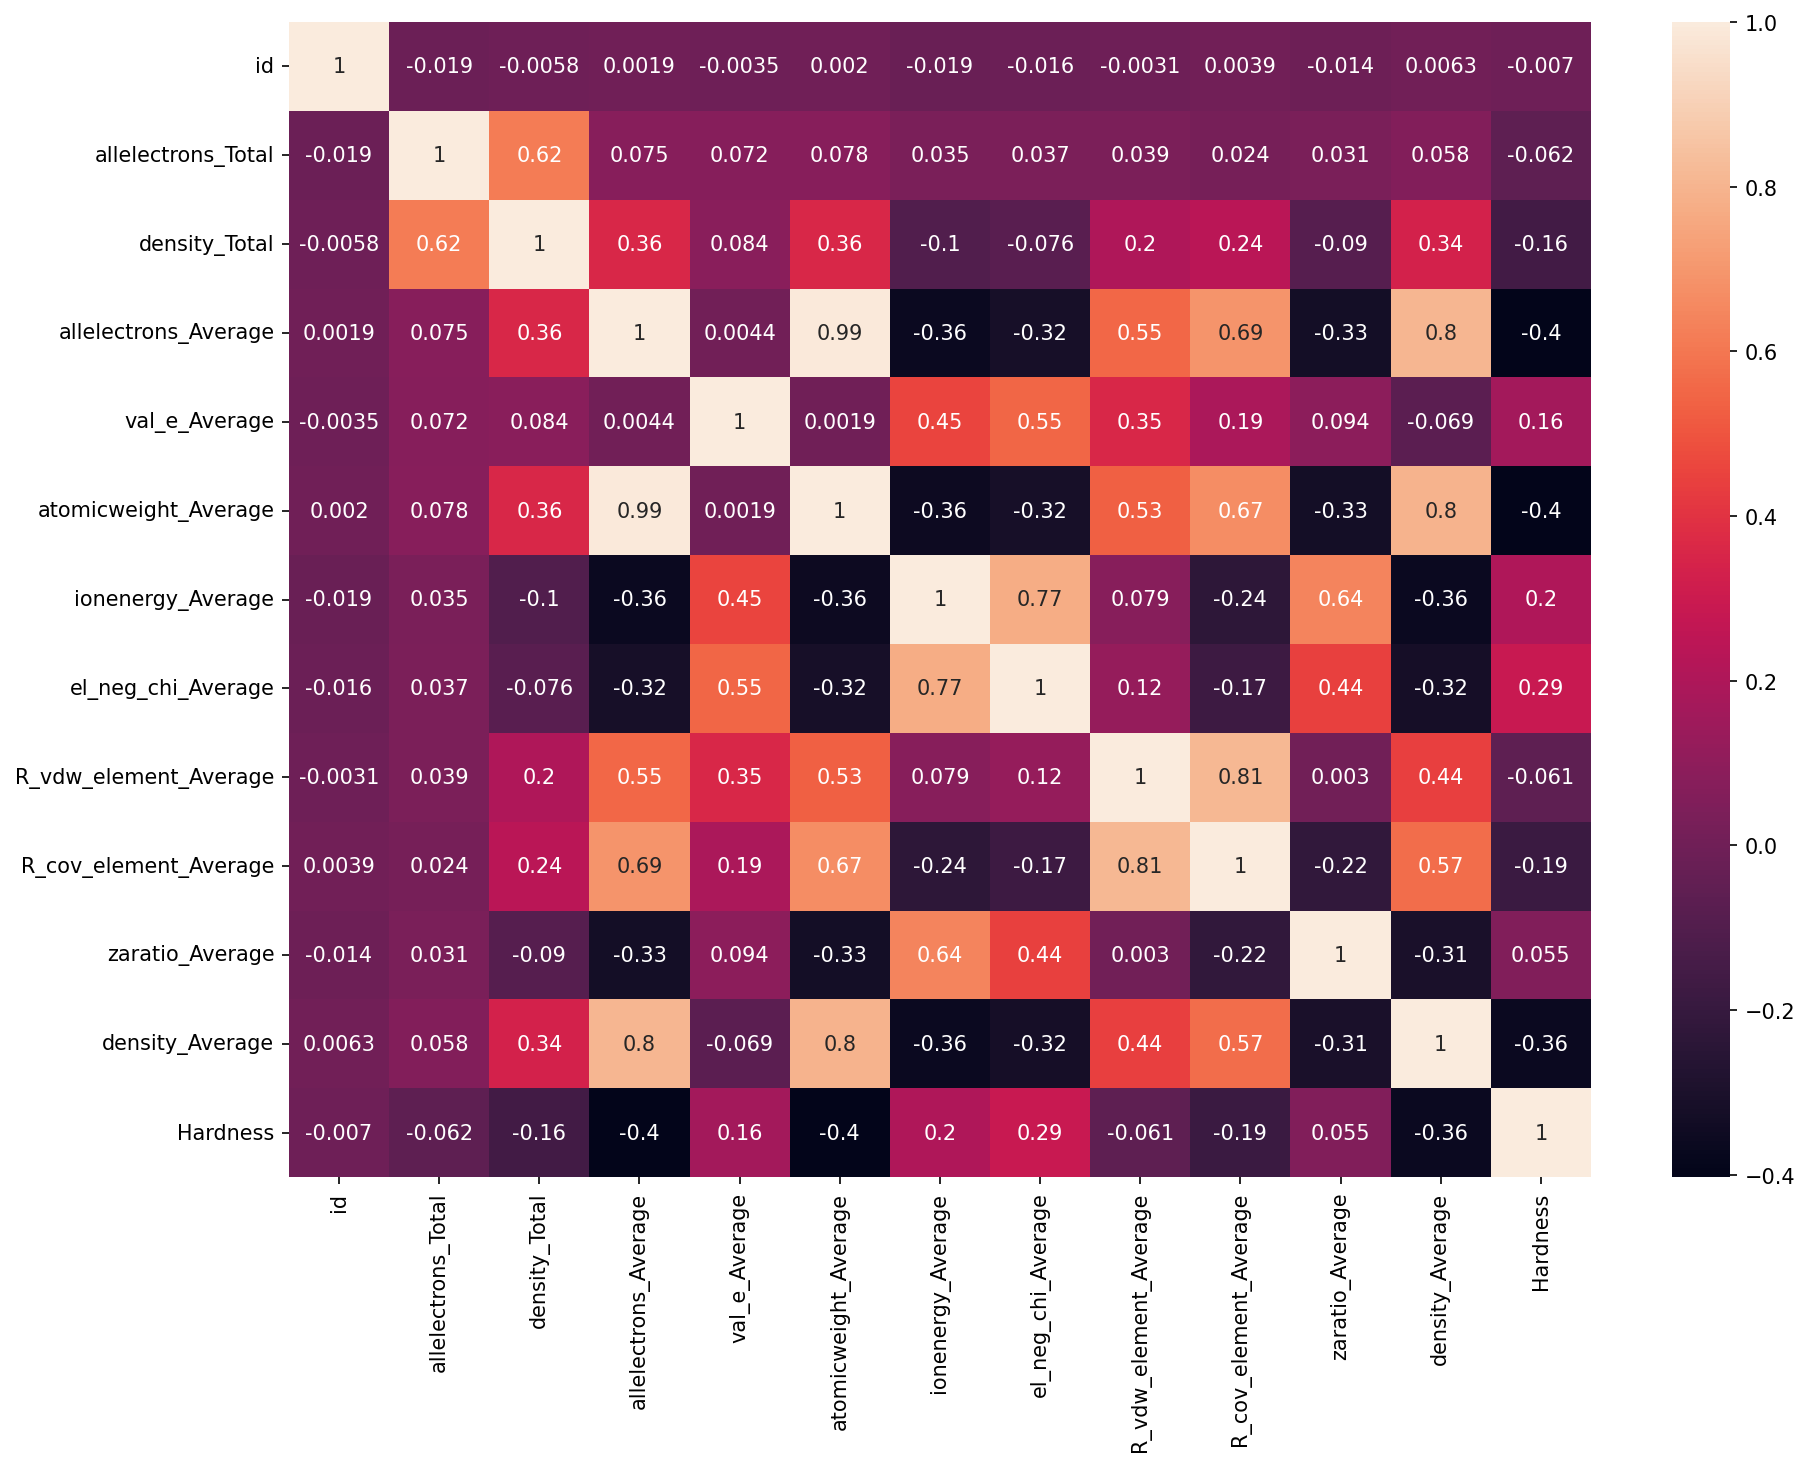

In [12]:
plt.figure(figsize=(14,10), dpi=150)
sns.heatmap(train.corr(numeric_only=True), annot=True)

<Axes: xlabel='Hardness', ylabel='Count'>

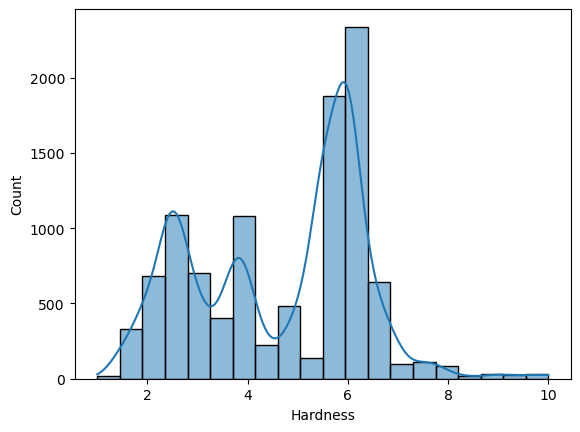

In [13]:
sns.histplot(train["Hardness"], bins=20, kde=True)

<Axes: xlabel='density_Average', ylabel='Count'>

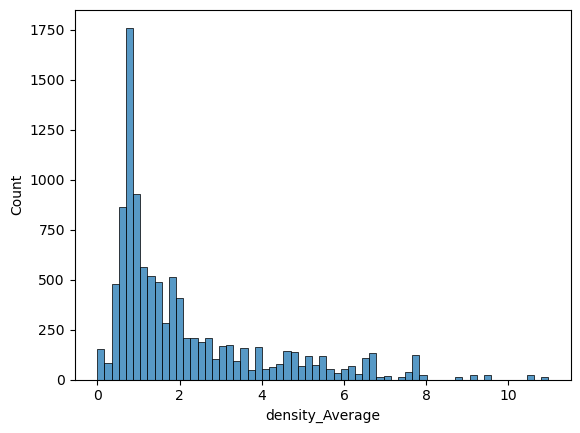

In [14]:
sns.histplot(train, x="density_Average")

<Axes: xlabel='allelectrons_Average', ylabel='Count'>

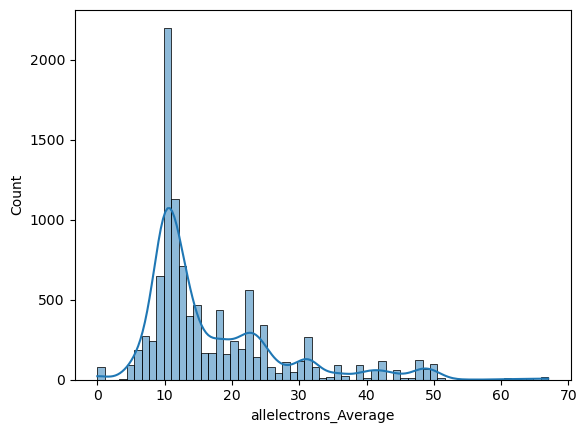

In [15]:
sns.histplot(train["allelectrons_Average"], kde=True)

<Axes: xlabel='val_e_Average', ylabel='Count'>

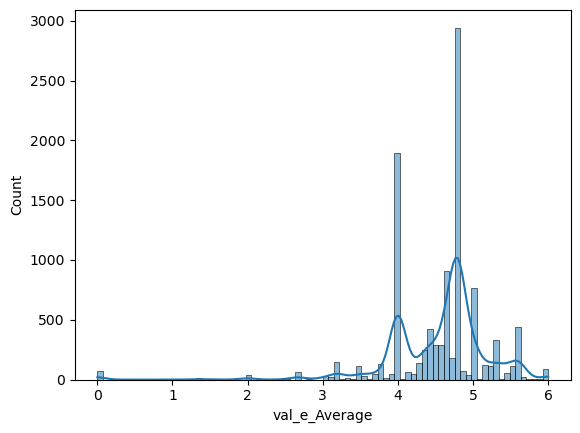

In [16]:
sns.histplot(train["val_e_Average"], kde=True)

## Modelling 

In [17]:
x = train.drop(['id', 'Hardness'], axis=1)
y = train['Hardness']

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):

        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [19]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.447036,1.225967,0.924865
XGBRegressor,0.398363,1.278786,0.945685
mlp_regressor,0.366395,1.312320,1.006220
KNeighborsRegressor,0.321204,1.358314,1.097636
AdaBoost,0.299466,1.379892,1.023559
SVR,0.299443,1.379914,1.006464
Ridge,0.226313,1.450151,1.173114
Linear,0.225372,1.451032,1.172016
SGD,0.210659,1.464748,1.210022
Lasso,-0.000084,1.648727,1.468926


In [25]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [26]:
GBR = GradientBoostingRegressor()

In [27]:
model = GBR.fit(x_train, y_train)

In [28]:
test = test.drop(['id'], axis=1)

In [29]:
pred = GBR.predict(test)

In [30]:
pred

array([3.16962812, 2.8435375 , 5.59915101, ..., 5.44888188, 4.02682299,
       2.7795072 ])

In [31]:
from sklearn.metrics import median_absolute_error

valid_pred = GBR.predict(x_test)

medae = median_absolute_error(y_test, valid_pred)
print("Validation MedAE:", medae)

Validation MedAE: 0.696434187119086


## Submission

In [32]:
submission_id = sample['id']

In [33]:
submission = pd.DataFrame({'id': submission_id, 'Hardness': pred})

In [34]:
submission.to_csv('submission.csv', index=False)
print('Submission Saved!')

Submission Saved!


## Conculison 

<img src="score.png" width="800">

In this project, various regression algorithms were applied to predict the **Mohs hardness** of minerals based on their physical and chemical properties.  
Among all models, **Gradient Boosting Regressor** achieved the best performance with a **Validation MedAE of approximately 0.69**.  

The model was then used to generate predictions for the test dataset, and the submission file was successfully uploaded to Kaggle with a **Public Score of 0.68010** and a **Private Score of 0.69798**.  
These results indicate that ensemble-based methods such as Gradient Boosting are effective for this type of regression problem.  
Future improvements may include **hyperparameter tuning**, **feature engineering**, and **ensemble stacking** to further optimize performance.


In [35]:
import joblib

# x: train.drop(['id','Hardness'], axis=1)
# GBR: eğitilmiş modelin
joblib.dump({"model": GBR, "features": x.columns.tolist()}, "mohs_model.joblib")
print("Saved -> mohs_model.joblib")

Saved -> mohs_model.joblib
